# Знакомство с временными рядами

Всопомогательная функция для получения финансовых данных от Google

In [3]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [26]:
import requests
from datetime import datetime
import pandas as pd

def get_price_data(query):
	r = requests.get("https://www.google.com/finance/markets/indexes", params=query)
	lines = r.text.splitlines()
	data = []
	index = []
	basetime = 0
	for price in lines:
		cols = price.split(",")
		if cols[0][0] == 'a':
			basetime = int(cols[0][1:])
			index.append(datetime.fromtimestamp(basetime))
			data.append([float(cols[4]), float(cols[2]), float(cols[3]), float(cols[1]), int(cols[5])])
		elif cols[0][0].isdigit():
			date = basetime + (int(cols[0])*int(query['i']))
			index.append(datetime.fromtimestamp(date))
			data.append([float(cols[4]), float(cols[2]), float(cols[3]), float(cols[1]), int(cols[5])])
	return pd.DataFrame(data, index = index, columns = ['Open', 'High', 'Low', 'Close', 'Volume'])

In [27]:
def plot_candlestick(df, ax=None, fmt="%Y-%m-%d"):
    if ax is None:
        fig, ax = plt.subplots()
    idx_name = df.index.name if df.index.name else 'index'
    dat = df.reset_index()[[idx_name, "Open", "High", "Low", "Close"]]
    dat[idx_name] = dat[idx_name].map(mdates.date2num)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    plt.xticks(rotation=45)
    _ = candlestick_ohlc(ax, dat.values, width=.6, colorup='g', alpha =1)
    ax.set_xlabel(idx_name)
    ax.set_ylabel("OHLC")
    return ax

## Установка зависимостей

In [28]:
# !pip install mpl_finance

# Получим данные компании APPLE за последний год

In [29]:
import pandas as pd

In [30]:
param = {
    'q': "FB", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'p': "1Y" # Period (Ex: "1Y" = 1 year)
}
# get price data (return pandas dataframe)
df = get_price_data(param)

ValueError: invalid literal for int() with base 10: '.l=function(e){function g(b){var c={};c[b]=k();a.cc_latency.push(c)}function m(b){var c=n("iml");b.setAttribute("data-iml"'

In [31]:
df.head()

,Open,High,Low,Close,Volume


# Построим временной ряд

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: no numeric data to plot

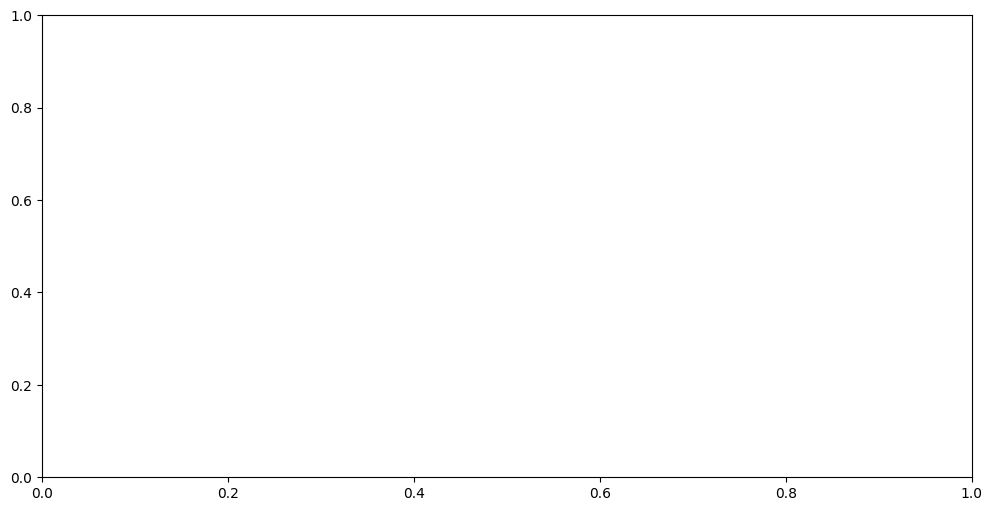

In [11]:
plt.figure(figsize=(12, 6))
df['Close'].plot()
plt.show()

 # Способы визуализации

In [ ]:
data = df['2018-06-15':'2018-06-30']

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], linewidth=10.0)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))
plot_candlestick(data, fig.subplots())
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Close'])
plt.show()

In [ ]:
def plot_candlestick(df, ax=None, fmt="%Y-%m-%d"):
    if ax is None:
        fig, ax = plt.subplots()
    idx_name = df.index.name if df.index.name else 'index'
    dat = df.reset_index()[[idx_name, "Open", "High", "Low", "Close"]]
    dat[idx_name] = dat[idx_name].map(mdates.date2num)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    plt.xticks(rotation=45)
    _ = candlestick_ohlc(ax, dat.values, width=.6, colorup='g', alpha =1)
    ax.set_xlabel(idx_name)
    ax.set_ylabel("OHLC")
    return ax

# Продажа машин в Квебеке

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Count'], linewidth=10)
plt.show()

In [ ]:
# Выделяем месяц
df['Month'] = df.apply(lambda s: int(s['Month'][-2:]), axis=1)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Count'], linewidth=10)
plt.plot(df[df['Month']==5]['Count'], 'ro')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Count'], linewidth=10)
plt.plot(df[df['Month']==9]['Count'], 'ro')
plt.show()

In [ ]:
x = df['Count'][:-1]
y = df['Count'][1:]
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.show()

In [ ]:
x = df['Count'][:-2]
y = df['Count'][2:]
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.show()

In [ ]:
x = df['Count'][:-12]
y = df['Count'][12:]
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.show()

# Считаем автокорреляцию

In [ ]:
for i in range(12):
    print(i, df['Count'].autocorr(i + 1))

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(df['Count'])
plt.show()

# Делаем ряд стационарным

In [ ]:
df = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Count'])
plt.show()

In [ ]:
autocorrelation_plot(df['Count'])
plt.show()

## Нормализуем дисперсию

In [ ]:
from scipy.stats import boxcox

In [ ]:
modified = boxcox(df['Count'], 0)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(modified)
plt.show()

## Дифференцируем

In [ ]:
import numpy as np

In [ ]:
modified = np.diff(modified, 1)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(modified)
plt.show()

In [ ]:
autocorrelation_plot(modified)
plt.show()

# Тест Дики-Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
test_stationarity(df['Count'])

In [ ]:
test_stationarity(modified)

# Еще варианты коррелограмм

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
tsplot(df['Count'])

In [ ]:
tsplot(modified)